In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("houseprice.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# EDA

In [3]:
#INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Checking Null Values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
#dropping Null Values
data1=data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis=1)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
daat2= data1.dropna()
daat2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
daat2.shape

(1094, 75)

In [8]:
# Summarize numerical features
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


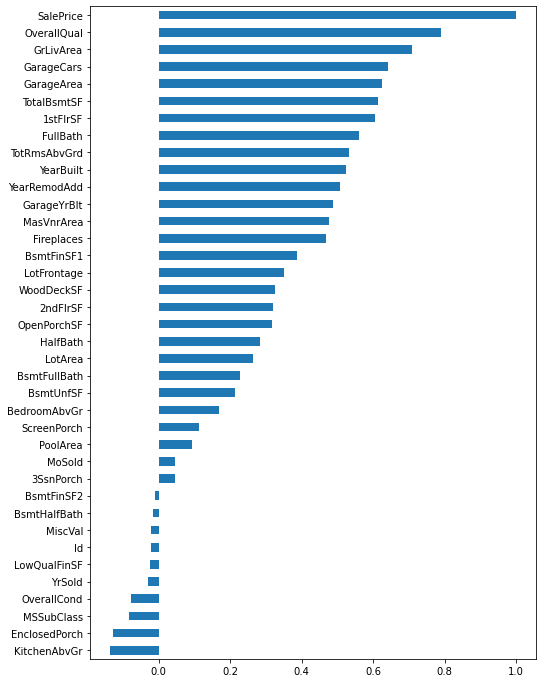

In [9]:
#orrelation with all features
plt.figure(figsize=(8, 12))
corr=data.corr()['SalePrice'].sort_values().plot(kind='barh')

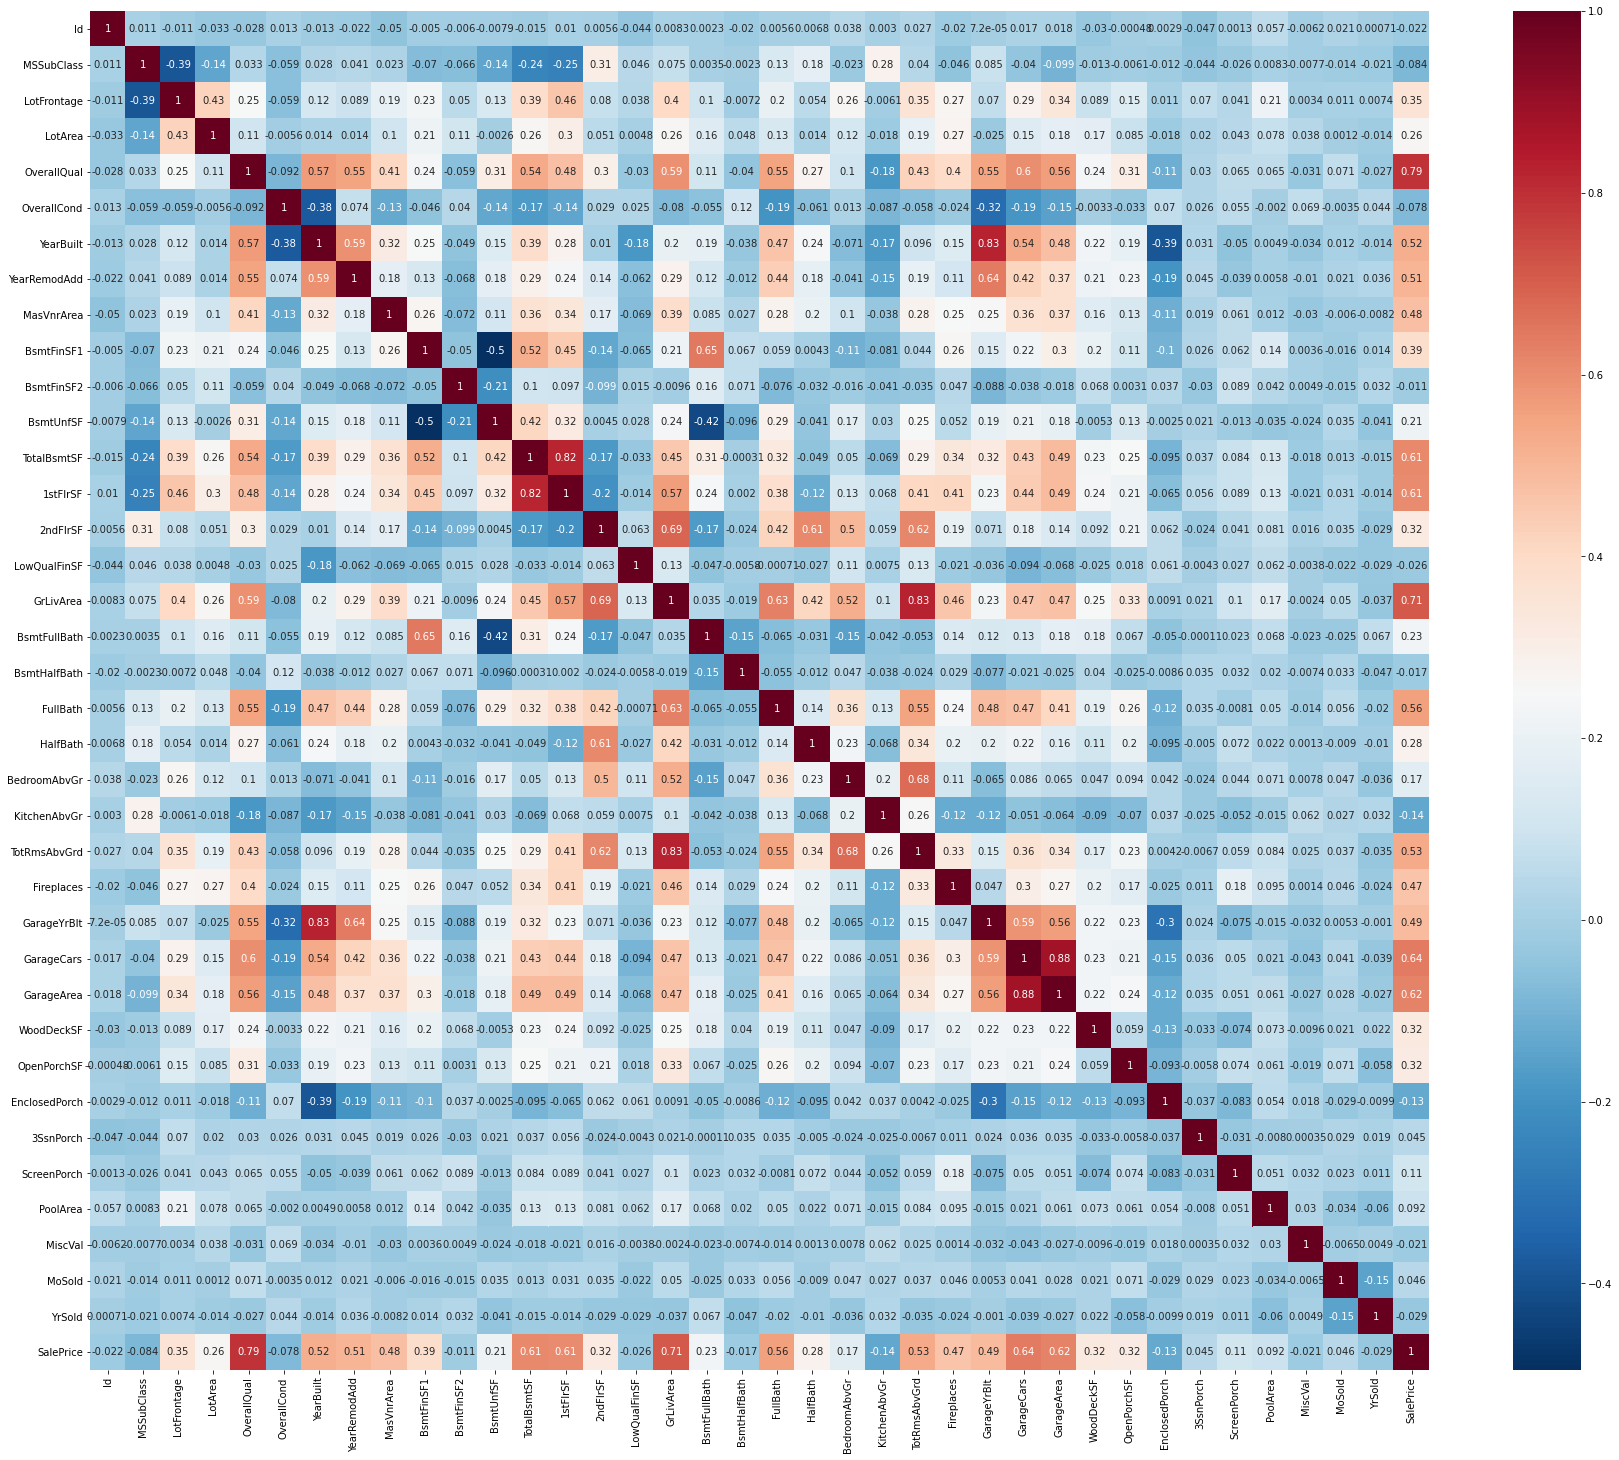

In [10]:
corr=data.corr()
plt.figure(figsize=(30, 25))
sb.heatmap(corr,annot=True,cmap="RdBu_r")

C:\Users\jack1\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


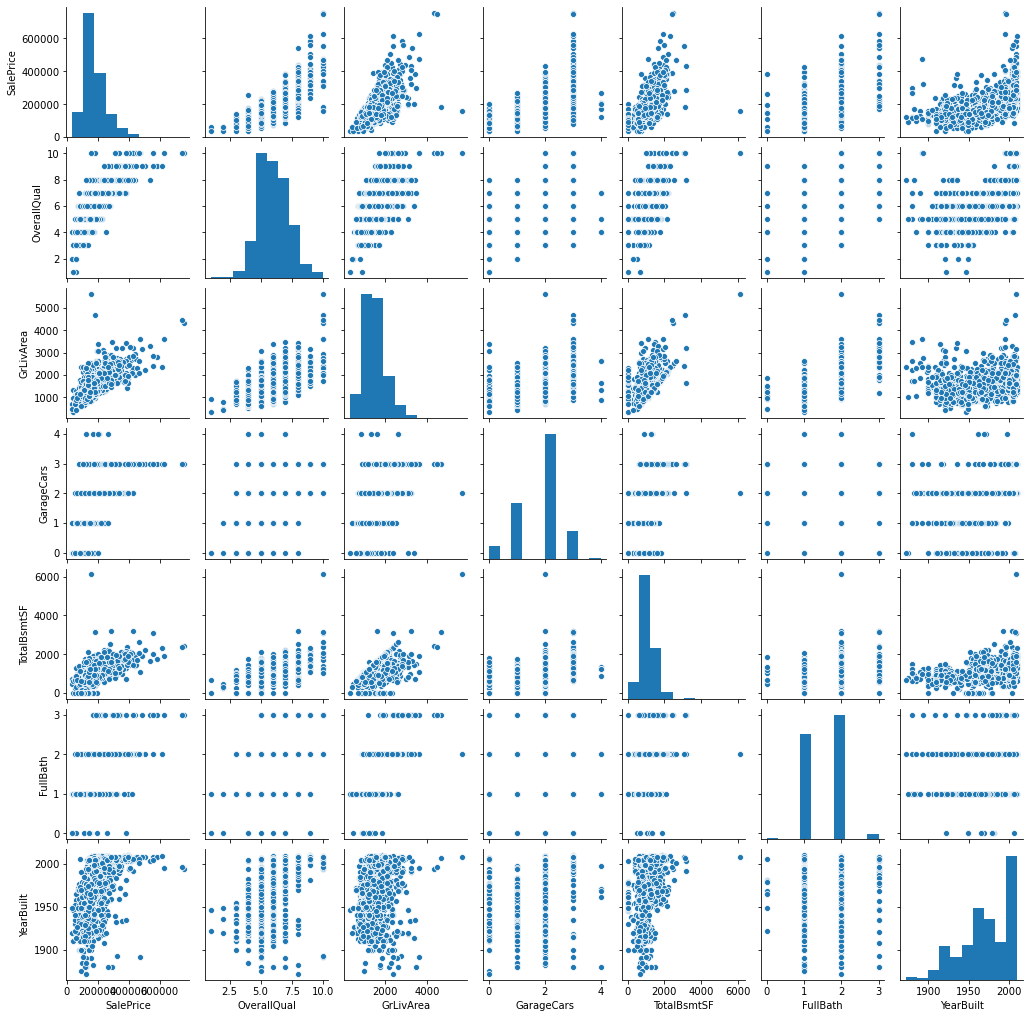

In [11]:
#Pairplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sb.pairplot(data[cols], size = 2)
plt.show()

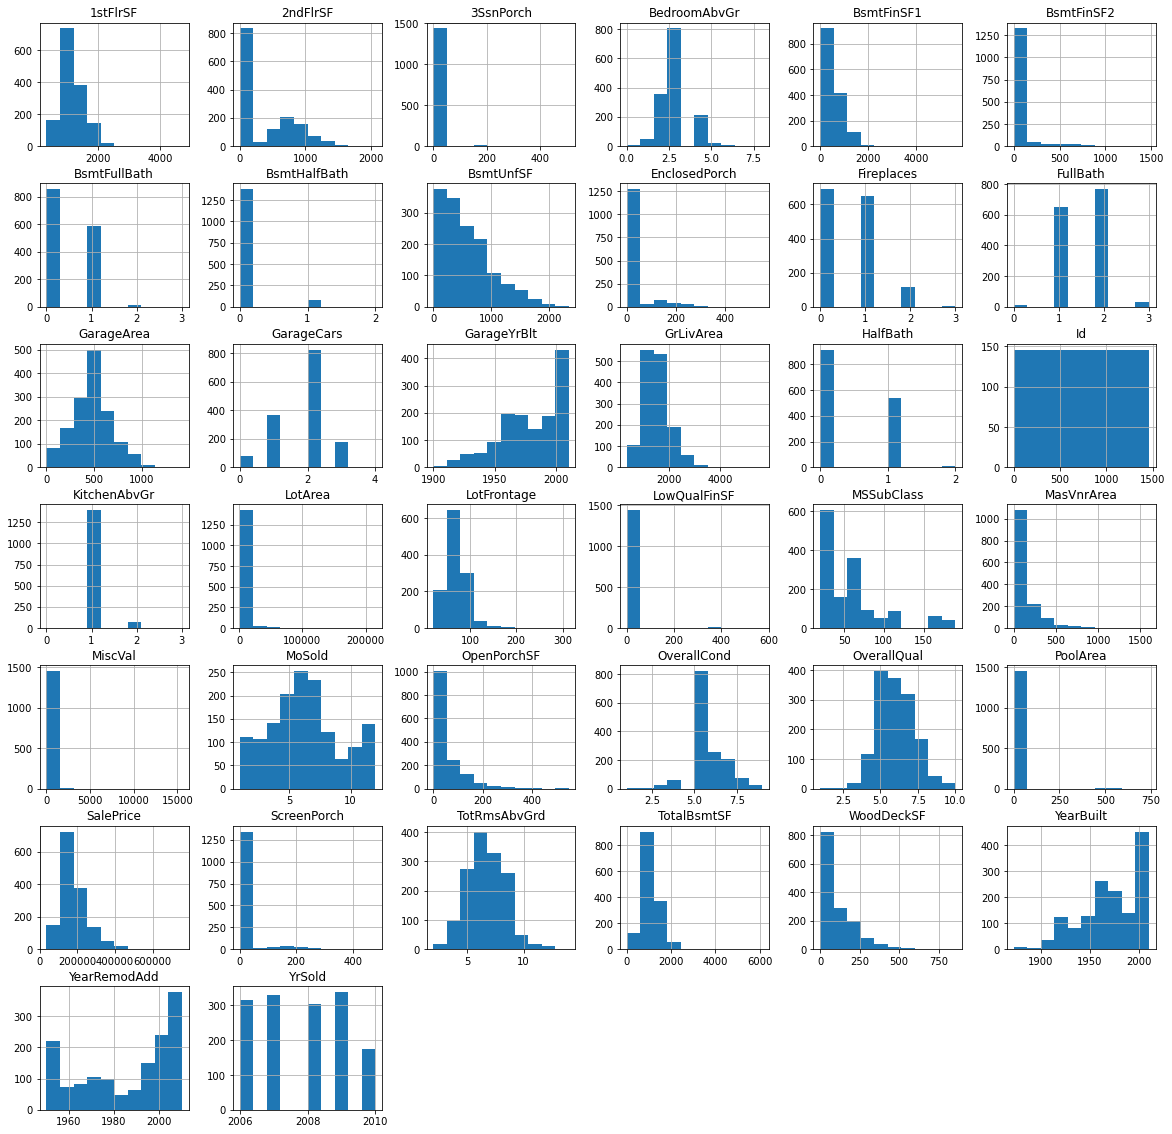

In [12]:
#Distributions of numeric features
data.hist(figsize=(20,20))
plt.show()

In [13]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder

In [14]:
data2=daat2.select_dtypes(include='object').columns

In [15]:
for x in data2:
    daat2[x]=LabelEncoder().fit_transform(daat2[x])
daat2

<ipython-input-15-da82cc32644a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daat2[x]=LabelEncoder().fit_transform(daat2[x])


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [16]:
daat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   int32  
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   int32  
 5   LotShape       1094 non-null   int32  
 6   LandContour    1094 non-null   int32  
 7   Utilities      1094 non-null   int32  
 8   LotConfig      1094 non-null   int32  
 9   LandSlope      1094 non-null   int32  
 10  Neighborhood   1094 non-null   int32  
 11  Condition1     1094 non-null   int32  
 12  Condition2     1094 non-null   int32  
 13  BldgType       1094 non-null   int32  
 14  HouseStyle     1094 non-null   int32  
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [17]:
x_ind= daat2.drop(['SalePrice'],axis=1)
y_dep = daat2.SalePrice

In [18]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaled_data=scaler.fit_transform(x_ind)

In [20]:
scaled_data

array([[ 0.09226353, -0.04467096, -0.23510813, ...,  0.16037678,
         0.3361008 ,  0.1655266 ],
       [-0.86108993, -0.04467096,  0.37719538, ..., -0.58941894,
         0.3361008 ,  0.1655266 ],
       [ 0.09226353, -0.04467096, -0.11264743, ...,  0.16037678,
         0.3361008 ,  0.1655266 ],
       ...,
       [ 0.33060189, -0.04467096, -0.1942879 , ...,  1.65996821,
         0.3361008 ,  0.1655266 ],
       [-0.86108993, -0.04467096, -0.11264743, ...,  1.65996821,
         0.3361008 ,  0.1655266 ],
       [-0.86108993, -0.04467096,  0.17309421, ...,  0.16037678,
         0.3361008 ,  0.1655266 ]])

In [21]:
scaled_data.shape

(1094, 74)

In [48]:
#PCA projection to 2D
from sklearn.decomposition import PCA
pca = PCA()
principle_components= pca.fit_transform(scaled_data)

In [49]:
principle_components.shape

(1094, 74)

In [50]:
principle_components

array([[ 1.85016377e+00, -3.14674195e-01, -1.66173178e+00, ...,
        -7.95285758e-15,  7.76705105e-15,  3.38435484e-16],
       [-1.43426451e-01, -1.39124898e+00,  1.91132980e+00, ...,
         1.71186280e-15,  4.47421896e-16,  1.50344235e-16],
       [ 2.33182809e+00, -2.80574990e-01, -1.39902407e+00, ...,
         7.95361593e-15,  3.59327527e-15, -1.32806491e-15],
       ...,
       [ 5.24925268e-01,  2.81818283e+00,  5.43591936e-01, ...,
         1.95594448e-16,  1.98381890e-16,  1.04616223e-16],
       [-3.24016013e+00, -2.24647284e+00,  2.83884793e+00, ...,
        -1.11128461e-16, -8.75018312e-17, -5.72855607e-17],
       [-1.15130957e+00, -2.06527272e+00,  2.49564082e+00, ...,
         5.80577275e-16, -2.96085551e-17,  3.57319180e-17]])

In [51]:
#import numpy as np
#cov_mat = np.cov(scaled_data.T)
#eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#print(eigen_vecs)

In [52]:
#print(eigen_vals)

In [53]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.52926599e-01, 5.62795746e-02, 5.11214786e-02, 4.19405517e-02,
       3.19053683e-02, 2.75446113e-02, 2.39076864e-02, 2.35442470e-02,
       2.24074667e-02, 2.10607155e-02, 1.94810755e-02, 1.84619705e-02,
       1.79948582e-02, 1.77693831e-02, 1.70401733e-02, 1.67800814e-02,
       1.60894525e-02, 1.53635720e-02, 1.53181275e-02, 1.48486128e-02,
       1.45116065e-02, 1.42522948e-02, 1.41652479e-02, 1.37851556e-02,
       1.34747931e-02, 1.27885015e-02, 1.24356547e-02, 1.23611829e-02,
       1.19123800e-02, 1.16184898e-02, 1.14946580e-02, 1.12387142e-02,
       1.08733445e-02, 1.04811407e-02, 1.02968292e-02, 9.83532925e-03,
       9.74893062e-03, 9.50228034e-03, 9.24560930e-03, 9.00974416e-03,
       8.69385684e-03, 8.44483217e-03, 8.02622392e-03, 7.84212892e-03,
       7.64026120e-03, 7.11983864e-03, 6.84712612e-03, 6.67039808e-03,
       6.14969450e-03, 5.99764488e-03, 5.60964688e-03, 5.46319503e-03,
       5.40779245e-03, 5.14243456e-03, 5.12233365e-03, 4.59781914e-03,
      

In [54]:
explained_variance.shape

(74,)

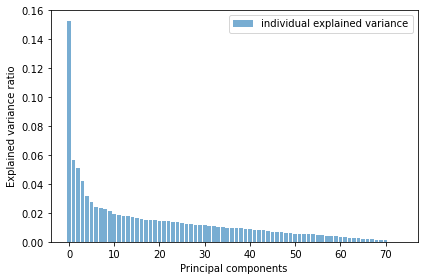

In [55]:
plt.figure(figsize=(6, 4))

plt.bar(range(74), explained_variance, alpha=0.6, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()


In [56]:
pca=PCA(0.95) #95%
X_new=pca.fit_transform(scaled_data)

In [57]:
X_new

array([[ 1.85016377e+00, -3.14674195e-01, -1.66173178e+00, ...,
        -2.10814331e-01, -2.94958907e-01, -8.45148515e-02],
       [-1.43426451e-01, -1.39124898e+00,  1.91132980e+00, ...,
         3.92295058e-01,  6.33787664e-01, -9.17074410e-02],
       [ 2.33182809e+00, -2.80574990e-01, -1.39902407e+00, ...,
        -4.01392613e-01,  8.31580641e-04, -8.52471027e-02],
       ...,
       [ 5.24925268e-01,  2.81818283e+00,  5.43591936e-01, ...,
         2.10343344e-01, -1.21899608e-02,  1.66419737e-01],
       [-3.24016013e+00, -2.24647284e+00,  2.83884793e+00, ...,
        -7.60621861e-01, -4.73749180e-01,  7.51150434e-01],
       [-1.15130957e+00, -2.06527272e+00,  2.49564082e+00, ...,
         4.96326149e-01, -3.22042354e-01, -1.49469815e-01]])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [59]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y_dep, test_size = 0.2, random_state=20)

In [60]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.15428571428571428 %
Test score after PCA 0.0045662100456621 %
